In [7]:
try:
    sc.stop()
except:
    pass

In [8]:
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName('Spark-logAnalysis').setMaster('local[4]')
sc = SparkContext.getOrCreate(conf = conf)

In [9]:
sc

<SparkContext master=local[4] appName=Spark-logAnalysis>

In [10]:
from pyspark.sql import SparkSession 
from pyspark.sql.types import StructField, StringType, IntegerType, StructType

spark = SparkSession.builder.appName('SQLSession').getOrCreate()

In [11]:
spark

In [16]:
df = spark.read.csv('hdfs://localhost:9000/spark/input/appl_stock.csv', inferSchema=True, header=True)

In [17]:
df.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



#### Create Temporary View or Table

In [20]:
df.createOrReplaceTempView('stock')

In [21]:
# df.createTempView('stock')

#### Run a simple SQL Query directly on View

In [22]:
result = spark.sql("SELECT * FROM stock WHERE HIGH >= 200")

In [23]:
result

DataFrame[Date: timestamp, Open: double, High: double, Low: double, Close: double, Volume: int, Adj Close: double]

In [24]:
result.show()

+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|               Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04 00:00:00|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05 00:00:00|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06 00:00:00|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07 00:00:00|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08 00:00:00|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|    

In [29]:
result_close = spark.sql("SELECT COUNT (*) FROM stock WHERE Close >= 500")

In [30]:
result_close.show()

+--------+
|count(1)|
+--------+
|     403|
+--------+



In [31]:
temp_df = spark.sql("SELECT Open, Close FROM stock WHERE High >= 500")
temp_df.show()

+------------------+------------------+
|              Open|             Close|
+------------------+------------------+
|        499.529991|502.60002099999997|
|        504.659988|        509.459991|
|        514.259995|        497.669975|
|        491.500008|502.20999900000004|
|        503.109993|         502.12001|
|506.88001299999996|        514.850021|
|        513.079994|        513.039993|
|        515.079987| 516.3899769999999|
| 519.6699980000001| 522.4099809999999|
|        521.309982|        525.760017|
|        527.960014|        535.410011|
| 541.5600049999999|        542.440025|
|        548.169983| 544.4699780000001|
|        544.240013|        545.180008|
|        545.420013| 533.1600269999999|
|        523.659996|        530.259987|
| 536.8000030000001| 530.6900099999999|
| 534.6899950000001|        541.989975|
|        544.209999|        545.170021|
| 548.9799879999999|        551.999977|
+------------------+------------------+
only showing top 20 rows



In [33]:
temp_df1 = temp_df.toPandas()

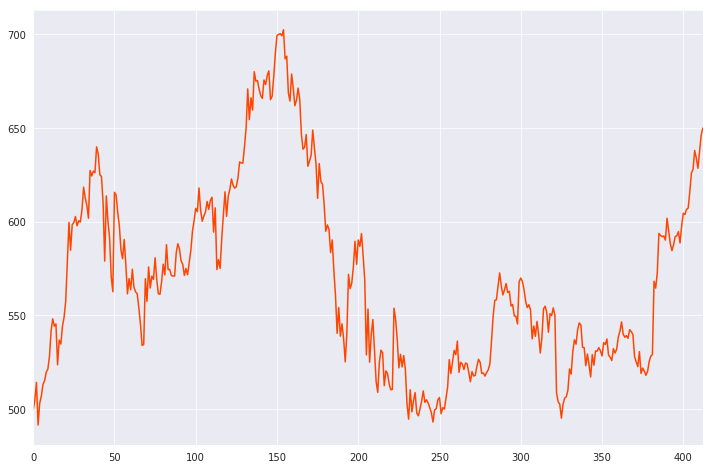

In [41]:
import seaborn as sns
sns.set_style('darkgrid')
temp_df1['Open'].plot(figsize = (12,8), color = 'orangered')